# **Mid-term Project: Implementing Object Detection on a Dataset**

## **PERCI, RENZ DEXTER M.** & **REYES, FAVIELLE ANNE O.**
## BSCS-4A IS


## 1. Selection of Dataset and Algorithm:

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="9wNF5Bb9cpKIvNwqpVYu")
project = rf.workspace("tutorial-knlj8").project("chess-board-detection-uuppk")
version = project.version(4)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chess-Board-Detection-4 in yolov11:: 100%|██████████| 160/160 [00:00<00:00, 4811.29it/s]


## 2. Implementation

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 23.2 MB/s eta 0:00:00


### 2.2 Model Building

In [ ]:
from ultralytics import YOLO

# Load a pretrained model from the Ultralytics HUB
model = YOLO("/content/yolo11m.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### 2.3 Training the Model

In [ ]:
# Train the model
results = model.train(data="/content/Chess-Board-Detection-4/data.yaml", epochs=100, imgsz=640)

Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11m.pt, data=/content/Chess-Board-Detection-4/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 24.0MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytic

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 104MB/s]


AMP: checks passed ✅


train: Scanning /content/Chess-Board-Detection-4/train/labels... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 1907.81it/s]

train: New cache created: /content/Chess-Board-Detection-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Chess-Board-Detection-4/valid/labels... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<00:00, 1050.46it/s]

val: New cache created: /content/Chess-Board-Detection-4/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.64G      1.762      4.453      1.486        344        640: 100%|██████████| 4/4 [00:05<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all          6        118     0.0261      0.283     0.0338     0.0155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.53G       1.67      4.292        1.4        372        640: 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]

                   all          6        118     0.0733      0.546      0.115     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.72G      1.532      2.907      1.257        444        640: 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]


                   all          6        118      0.434      0.476      0.385      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.75G      1.443      1.795      1.199        487        640: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]


                   all          6        118      0.286      0.809      0.596      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.75G      1.428       1.49       1.17        420        640: 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]

                   all          6        118      0.437      0.717      0.615      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.76G      1.365      1.301      1.125        507        640: 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]


                   all          6        118      0.506      0.735      0.664      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.73G      1.337      1.078      1.146        508        640: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all          6        118      0.576      0.722      0.744      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       8.8G      1.331     0.9993      1.126        453        640: 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all          6        118      0.727      0.802      0.819      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.81G      1.335     0.9178      1.133        566        640: 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all          6        118       0.66      0.789      0.762      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.76G      1.312      0.856      1.126        366        640: 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]

                   all          6        118      0.755      0.767      0.811      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.78G      1.299     0.8742      1.106        469        640: 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


                   all          6        118       0.79      0.761      0.825      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.82G      1.338     0.8416      1.136        388        640: 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]

                   all          6        118      0.767      0.802      0.834      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.81G      1.285     0.7873      1.113        364        640: 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all          6        118      0.857      0.821      0.892      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.69G      1.251     0.7496      1.103        431        640: 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]

                   all          6        118      0.833      0.828      0.908      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       8.8G      1.223     0.7384      1.095        400        640: 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]

                   all          6        118      0.738      0.863      0.872      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.79G      1.228     0.7101      1.083        462        640: 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]

                   all          6        118       0.77      0.849      0.889       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.73G      1.184     0.7297      1.088        384        640: 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all          6        118      0.697      0.852      0.822      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.74G      1.192     0.7008       1.08        460        640: 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all          6        118      0.665       0.83      0.813      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.62G      1.147     0.6581      1.062        459        640: 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all          6        118      0.736      0.869      0.864      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.78G       1.15     0.6742       1.05        490        640: 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]

                   all          6        118      0.776      0.867      0.865      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.82G      1.128     0.6531      1.064        480        640: 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.22it/s]

                   all          6        118      0.687      0.866      0.827      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.66G      1.159     0.6713      1.081        398        640: 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all          6        118      0.728      0.855      0.844      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.67G      1.126     0.6524      1.073        433        640: 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


                   all          6        118      0.805      0.899      0.913      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.79G      1.094     0.6344      1.037        640        640: 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.22it/s]

                   all          6        118      0.855      0.835      0.933      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.75G      1.068     0.6176      1.057        427        640: 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]

                   all          6        118      0.805      0.942      0.944      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.69G      1.092     0.6526      1.062        280        640: 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.37it/s]

                   all          6        118      0.802      0.915      0.928      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.77G      1.045     0.6451      1.055        508        640: 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all          6        118      0.844      0.928      0.945      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.76G      1.057     0.6252      1.035        443        640: 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]

                   all          6        118       0.86      0.934      0.963      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.62G       1.03     0.6198      1.007        661        640: 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]

                   all          6        118      0.757      0.899      0.897      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.67G      1.027     0.6289      1.039        484        640: 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.70it/s]

                   all          6        118      0.892      0.908      0.942      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.72G      1.018     0.6183      1.025        443        640: 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


                   all          6        118      0.954      0.916      0.976      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.78G      1.036     0.5936      1.013        525        640: 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all          6        118      0.898      0.946      0.973      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       8.8G     0.9717     0.5995      1.009        430        640: 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all          6        118      0.908       0.95      0.969      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.81G     0.9266     0.5608     0.9809        425        640: 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]

                   all          6        118      0.912      0.953      0.972      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.79G      0.944     0.5667     0.9905        400        640: 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all          6        118      0.937      0.935      0.968      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.68G     0.9835     0.5486      1.016        442        640: 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all          6        118      0.901      0.945      0.951      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.72G     0.9365     0.5293     0.9765        473        640: 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]

                   all          6        118      0.887      0.931       0.94      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.64G     0.9963     0.5755      1.021        524        640: 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]

                   all          6        118      0.905      0.914      0.936      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.73G     0.9292     0.5217     0.9876        467        640: 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

                   all          6        118      0.927      0.924      0.958      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.71G     0.9731     0.5338     0.9996        356        640: 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all          6        118      0.914      0.938      0.963      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.66G     0.9129     0.5308     0.9787        459        640: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]


                   all          6        118      0.917      0.936      0.966       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.78G     0.9368     0.5296     0.9939        430        640: 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]

                   all          6        118      0.911      0.944      0.971      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.77G     0.8854     0.5056     0.9554        520        640: 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all          6        118      0.905      0.945      0.972      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.73G     0.8441     0.4791     0.9272        599        640: 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all          6        118      0.899      0.951      0.974      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.66G      0.828     0.4998     0.9426        542        640: 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all          6        118      0.907      0.957      0.972      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       8.7G     0.8324     0.4954     0.9501        306        640: 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]

                   all          6        118      0.905      0.945      0.971      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.69G     0.7893     0.4737     0.9372        476        640: 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.90it/s]

                   all          6        118      0.912      0.951      0.977      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.75G     0.8464     0.4893     0.9643        345        640: 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]

                   all          6        118      0.904       0.96      0.974      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.65G     0.7722     0.4692     0.9278        381        640: 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all          6        118       0.91      0.966      0.979      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.68G     0.8019     0.4661     0.9235        307        640: 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

                   all          6        118      0.974      0.927      0.986      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.55G     0.7668     0.4794     0.9422        420        640: 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.09it/s]

                   all          6        118      0.954       0.95      0.985      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.61G     0.8263     0.4853     0.9491        424        640: 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]

                   all          6        118      0.947      0.956      0.983      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.78G     0.7641     0.4545      0.919        481        640: 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


                   all          6        118      0.937      0.945      0.982      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.76G     0.7819     0.4497     0.9207        494        640: 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]


                   all          6        118      0.943      0.938      0.982      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.67G     0.7375     0.4366       0.92        465        640: 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.11it/s]

                   all          6        118      0.943      0.942      0.981       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.66G     0.7386     0.4469     0.9189        345        640: 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

                   all          6        118      0.924      0.952       0.98      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.61G     0.7496     0.4432       0.92        467        640: 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]

                   all          6        118      0.933      0.944      0.982      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.65G     0.7456     0.4385     0.9189        468        640: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]

                   all          6        118      0.961      0.928      0.979      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.65G      0.713     0.4332     0.9005        480        640: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all          6        118      0.946       0.92      0.977      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.69G     0.6895     0.4169     0.8911        507        640: 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]

                   all          6        118      0.913      0.932      0.971      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       8.7G     0.7042     0.4174     0.9065        425        640: 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]

                   all          6        118      0.893      0.947      0.968      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.78G     0.6989     0.4253     0.9055        377        640: 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all          6        118      0.862      0.901      0.946        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.69G     0.6785     0.3973     0.8918        383        640: 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]


                   all          6        118      0.909      0.866      0.924      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       8.8G     0.6468     0.4073     0.8892        313        640: 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.28it/s]

                   all          6        118       0.89      0.852      0.908      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.68G     0.6928     0.4212      0.906        441        640: 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]

                   all          6        118      0.887      0.826      0.889       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.77G     0.6599     0.4033     0.8837        399        640: 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]

                   all          6        118      0.877      0.823      0.891       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.69G     0.6068     0.3837     0.8792        454        640: 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all          6        118      0.885      0.826      0.901      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.71G     0.6078     0.3834      0.878        355        640: 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all          6        118      0.898      0.826      0.913      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.71G     0.6138     0.3888     0.8773        459        640: 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.58it/s]

                   all          6        118      0.889      0.837      0.917      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.76G     0.6249     0.3872     0.8692        389        640: 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.09it/s]

                   all          6        118      0.893      0.851      0.918      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.75G     0.5637     0.3698     0.8588        455        640: 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]

                   all          6        118      0.898      0.843      0.925      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.65G     0.5848     0.3759      0.867        368        640: 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]

                   all          6        118      0.901      0.855       0.93      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.77G     0.5824     0.3695     0.8624        373        640: 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]


                   all          6        118      0.867      0.864      0.918      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       8.8G     0.6008     0.3719     0.8627        378        640: 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.18it/s]

                   all          6        118      0.869      0.873      0.923      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.64G     0.5897     0.3839     0.8856        357        640: 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]

                   all          6        118      0.887      0.872      0.926      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.64G      0.541     0.3622      0.868        450        640: 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]

                   all          6        118      0.887      0.862      0.924      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.68G     0.5579     0.3694      0.864        482        640: 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


                   all          6        118      0.883      0.865      0.928      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.62G     0.5702     0.3661     0.8527        506        640: 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.73it/s]

                   all          6        118      0.898      0.844      0.935      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.71G     0.5443     0.3517     0.8484        620        640: 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.09it/s]

                   all          6        118      0.904      0.843      0.937      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.75G     0.5399     0.3497     0.8655        391        640: 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.09it/s]

                   all          6        118      0.841      0.932      0.941      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.69G     0.5325     0.3485     0.8504        513        640: 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]


                   all          6        118      0.843      0.932      0.946      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.78G     0.5374     0.3536     0.8477        412        640: 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.17it/s]

                   all          6        118      0.875      0.876      0.937      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.67G     0.5281     0.3475     0.8568        454        640: 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]

                   all          6        118       0.83      0.928      0.942      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.65G     0.5017     0.3421     0.8534        393        640: 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.94it/s]

                   all          6        118       0.83       0.93      0.944      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.72G     0.5115     0.3428     0.8517        489        640: 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all          6        118      0.839       0.92      0.942      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.69G     0.5156     0.3444     0.8504        493        640: 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

                   all          6        118      0.854      0.904      0.942      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.69G     0.5005     0.3313     0.8455        380        640: 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]

                   all          6        118      0.835      0.945      0.941      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.69G        0.5     0.3279     0.8482        351        640: 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.91it/s]

                   all          6        118      0.851      0.892      0.935      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.75G      0.496     0.3271     0.8386        433        640: 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]

                   all          6        118      0.856      0.886      0.933      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.67G     0.4975      0.333     0.8471        345        640: 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all          6        118      0.878      0.865      0.924      0.601


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.62G     0.4679     0.3256     0.8467        245        640: 100%|██████████| 4/4 [00:05<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all          6        118      0.866      0.875      0.925      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.63G     0.4171     0.2842     0.8173        358        640: 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]

                   all          6        118      0.864      0.875      0.913      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.62G     0.4447       0.31     0.8422        313        640: 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.54it/s]

                   all          6        118      0.865      0.876      0.912      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.62G     0.4361      0.299     0.8359        262        640: 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]

                   all          6        118      0.878      0.864      0.909      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.62G     0.4235     0.2881     0.8222        220        640: 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all          6        118      0.914      0.847      0.904      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.62G     0.4036     0.2867     0.8299        263        640: 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]

                   all          6        118      0.912      0.851      0.909      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.62G     0.3962     0.2785     0.8156        318        640: 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.67it/s]

                   all          6        118      0.912      0.853      0.909      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.62G     0.4083     0.2842     0.8277        266        640: 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]

                   all          6        118      0.919      0.851       0.91      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.62G     0.4119     0.2827      0.821        321        640: 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]


                   all          6        118      0.919      0.851      0.914      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.62G     0.3952     0.2701     0.8092        292        640: 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

                   all          6        118      0.919      0.851      0.914      0.587



100 epochs completed in 0.116 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,039,284 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


                   all          6        118      0.954      0.949      0.985      0.646
           black-camel          5         10      0.976        0.9      0.986      0.655
        black-elephant          5          9      0.959          1      0.995       0.61
           black-horse          5         10          1      0.781      0.995      0.579
            black-king          5          5      0.937          1      0.995      0.666
            black-pawn          5         34      0.937      0.971      0.953      0.563
           black-queen          4          4          1      0.968      0.995      0.706
           white-camel          4          8          1      0.949      0.995      0.688
        white-elephant          3          6      0.943          1      0.995      0.564
           white-horse          4          8          1      0.982      0.995       0.76
            white-king          3          3          1      0.895      0.995      0.707
            white-paw

lr/pg0,▁▁▂▂▃▃▄▄▆████▇▇▇▇▇▇▆▆▆▆▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁
lr/pg1,▃▄▄▅▇█████▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg2,▁▁▂▃▄▆▆▇▇██████▇▇▇▆▆▆▆▅▅▅▄▄▄▄▄▃▃▃▂▂▂▂▂▁▁
metrics/mAP50(B),▁▃▅▇▆▇▇▇▇▇█████████████████▇▇▇██████████
metrics/mAP50-95(B),▁▃▅▅▅▆▆▇▇▆▇▇▇▇▇▇█▇██▇█████████▇▇█▇▇███▇▇
metrics/precision(B),▁▁▄▅▆▇▆▇▇▇▇████████████████▇▇██▇▇▇▇▇▇▇▇█
metrics/recall(B),▁▆▄▅▆▆▇▇▆▇▇▇▇██▇███████████▇▆▆▆▆▇▆▇▇█▇▇▆
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,██▆▆▆▅▅▅▅▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁


### 2.4.1 Testing the model using testing set


0: 640x640 3 black-camels, 2 black-elephants, 1 black-horse, 1 black-king, 1 black-pawn, 1 black-queen, 2 white-camels, 2 white-elephants, 1 white-horse, 1 white-king, 1 white-pawn, 1 white-queen, 40.3ms
Speed: 2.7ms preprocess, 40.3ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
Inference Time for /content/Chess-Board-Detection-4/test/images/20230315_195425_jpg.rf.ade863ff45e600f66303e669849b0ff9.jpg: 0.6241 seconds


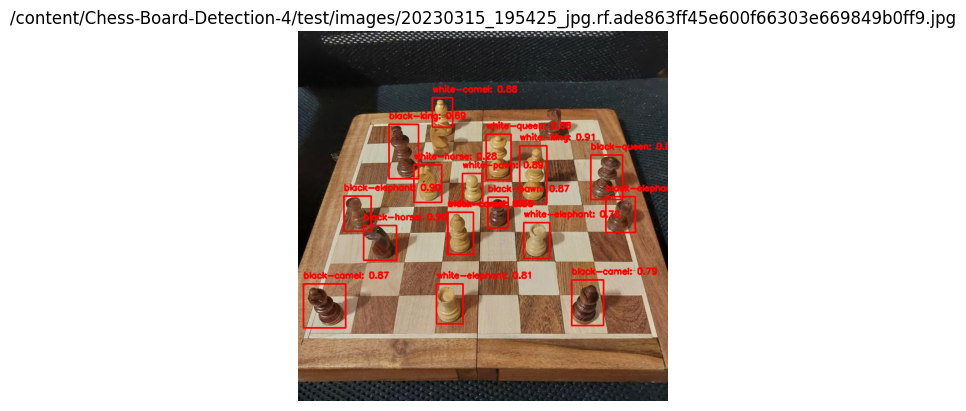


0: 640x640 4 black-camels, 2 black-elephants, 1 black-horse, 2 black-pawns, 3 black-queens, 2 white-elephants, 1 white-king, 2 white-pawns, 36.4ms
Speed: 6.5ms preprocess, 36.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Inference Time for /content/Chess-Board-Detection-4/test/images/20230315_194307_jpg.rf.20dcc57ba2dcfdd1ca6c921cd3fc6c14.jpg: 0.0546 seconds


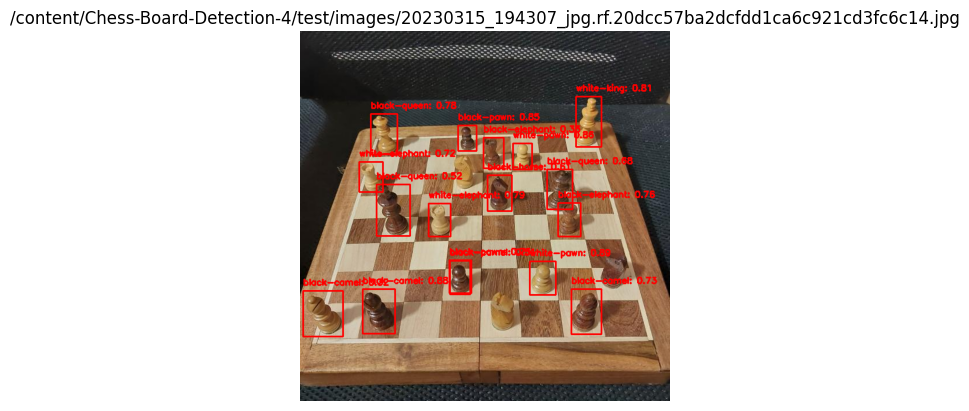


0: 640x640 2 black-elephants, 1 black-horse, 1 black-king, 1 white-camel, 2 white-elephants, 2 white-horses, 36.4ms
Speed: 2.4ms preprocess, 36.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Inference Time for /content/Chess-Board-Detection-4/test/images/20230315_195331_jpg.rf.d4e8d549a869a7b3cf03aa58b18ecb85.jpg: 0.0511 seconds


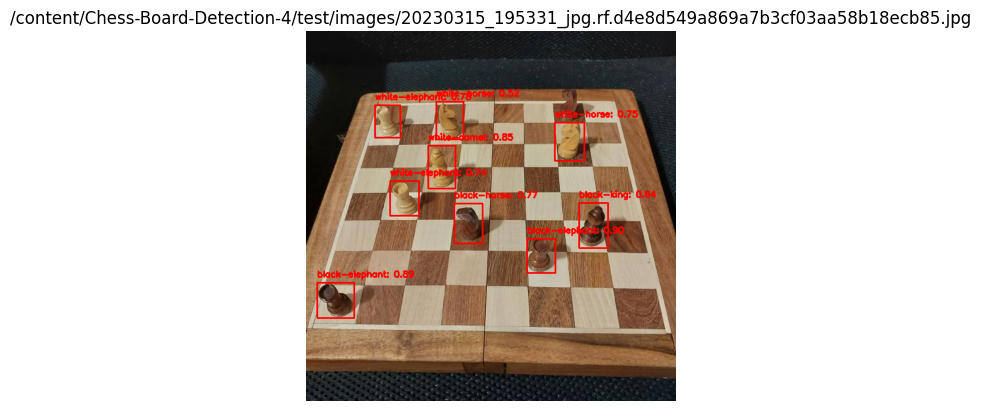


0: 640x640 1 black-pawn, 3 white-camels, 3 white-elephants, 1 white-horse, 1 white-king, 8 white-pawns, 36.4ms
Speed: 2.2ms preprocess, 36.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Inference Time for /content/Chess-Board-Detection-4/test/images/20230315_193509_jpg.rf.6a788bb87d85fc2661fdec5a6f4c0a6b.jpg: 0.0489 seconds


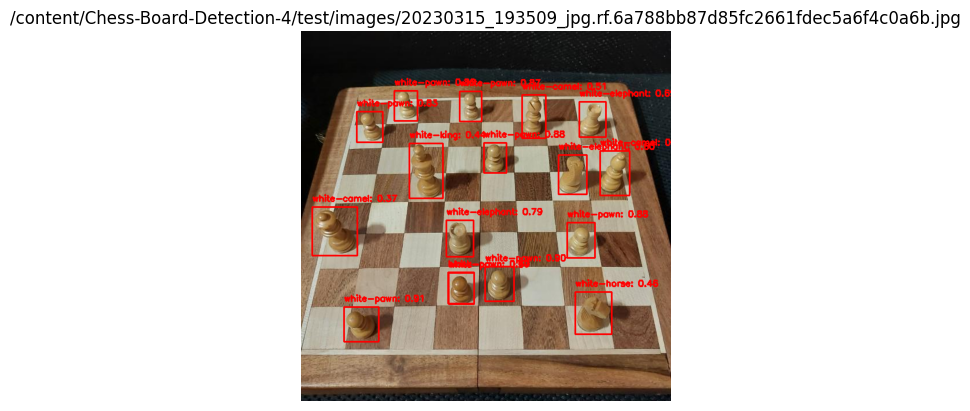


0: 480x640 2 black-camels, 2 black-elephants, 2 black-horses, 1 black-king, 8 black-pawns, 1 black-queen, 2 white-camels, 2 white-elephants, 2 white-horses, 1 white-king, 8 white-pawns, 1 white-queen, 30.1ms
Speed: 2.8ms preprocess, 30.1ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Inference Time for /content/Chess-Board-Detection-4/test/images/photo_2023-03-07-12-31-27_jpeg.rf.f0e8a63e3376386e3163dd79d7499054.jpg: 0.0431 seconds


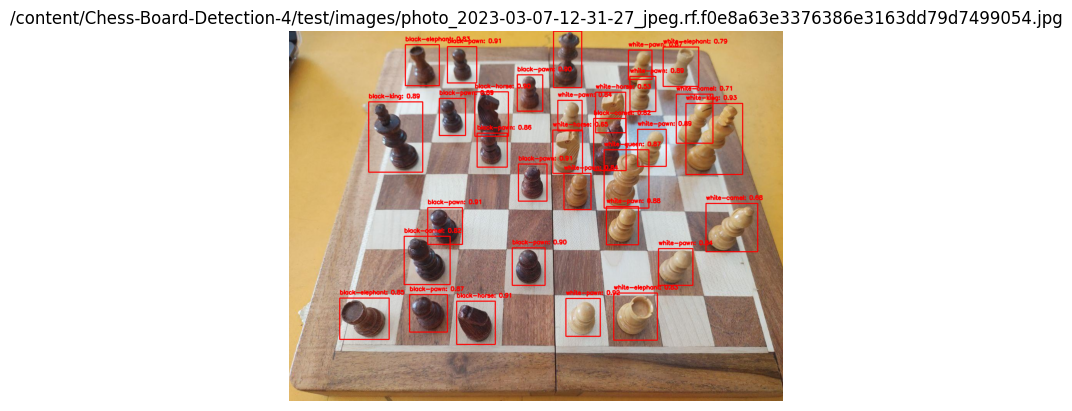

In [ ]:
import time
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os

# Function to get all image file paths from a directory
def get_image_paths(directory):
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')  # Add any image extensions you want
    image_paths = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(valid_extensions)]
    return image_paths

# Function to load and preprocess the image
def load_image(image_path):
    image = cv2.imread(image_path)  # Load the image using OpenCV
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    return image

# Function to process multiple images and perform object detection
def detect_objects_in_images(image_paths, model):
    """Detect objects in multiple images using the YOLO model and visualize results."""
    for image_path in image_paths:
        # Load and preprocess the image
        image = load_image(image_path)

        # Measure the start time for inference
        start_time = time.time()

        # Run inference on the image
        results = model.predict(image)

        # Measure the end time for inference and calculate inference time
        end_time = time.time()
        inference_time = end_time - start_time
        print(f"Inference Time for {image_path}: {inference_time:.4f} seconds")

        # Draw bounding boxes and labels on the image
        for result in results:
            boxes = result.boxes  # Get bounding boxes
            for box in boxes:
                # Get box coordinates and move the tensor to CPU before converting to NumPy
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
                conf = box.conf[0].item()  # Confidence score
                cls = int(box.cls[0].item())  # Class ID

                # Draw bounding box and label on the image
                label = f"{model.names[cls]}: {conf:.2f}"
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Display the image with bounding boxes
        plt.imshow(image)
        plt.axis('off')  # Hide axis
        plt.title(image_path)  # Optional: Add title with image path
        plt.show()

model = YOLO("/content/runs/detect/train/weights/best.pt")  # load a custom model

# Path to the directory containing images
image_directory = '/content/Chess-Board-Detection-4/test/images'

# Get list of image paths
image_paths = get_image_paths(image_directory)

# Run object detection on the images
detect_objects_in_images(image_paths, model)

### 2.4.2 Testing the model using new images


0: 640x320 1 black-camel, 2 black-elephants, 6 black-pawns, 2 white-camels, 2 white-elephants, 1 white-king, 3 white-pawns, 24.0ms
Speed: 3.2ms preprocess, 24.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 320)
Inference Time for /content/chess_board_0.webp: 0.0379 seconds


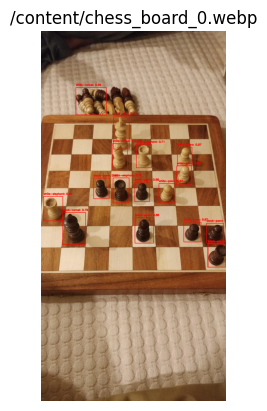


0: 384x640 1 black-king, 1 white-king, 2 white-queens, 25.2ms
Speed: 3.3ms preprocess, 25.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Inference Time for /content/chess_board_1.jpg: 0.0368 seconds


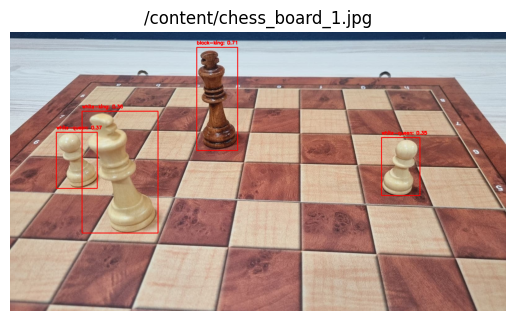

In [ ]:
images = ['/content/chess_board_0.webp', '/content/chess_board_1.jpg']  # Replace with your images

# Run object detection on the images
detect_objects_in_images(images, model)

## 3. Evaluation (Performance Metrics)

In [ ]:
from ultralytics import YOLO
model = YOLO("/content/runs/detect/train/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,039,284 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /content/Chess-Board-Detection-4/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


                   all          6        118      0.954       0.95      0.985      0.645
           black-camel          5         10      0.976        0.9      0.986      0.655
        black-elephant          5          9      0.959          1      0.995       0.61
           black-horse          5         10          1      0.783      0.995      0.576
            black-king          5          5      0.936          1      0.995      0.666
            black-pawn          5         34      0.937      0.971      0.953      0.555
           black-queen          4          4          1      0.968      0.995      0.706
           white-camel          4          8          1      0.949      0.995      0.677
        white-elephant          3          6      0.943          1      0.995      0.564
           white-horse          4          8          1      0.983      0.995      0.748
            white-king          3          3          1      0.896      0.995      0.679
            white-paw

In [ ]:
import numpy as np

# Access the confusion matrix
confusion_matrix = metrics.confusion_matrix.matrix

# Get true positive (TP), false positive (FP), and false negative (FN) from the matrix
TP = np.diag(confusion_matrix)  # True Positives are diagonal elements
FP = np.sum(confusion_matrix, axis=0) - TP  # False Positives per class
FN = np.sum(confusion_matrix, axis=1) - TP  # False Negatives per class

# Calculate precision and recall for each class
precision = TP / (TP + FP)  # Precision per class
recall = TP / (TP + FN)  # Recall per class

# Handle potential division by zero errors
precision = np.nan_to_num(precision, nan=0.0, posinf=0.0, neginf=0.0)
recall = np.nan_to_num(recall, nan=0.0, posinf=0.0, neginf=0.0)

# Calculate overall precision and recall (macro average)
overall_precision = np.mean(precision)
overall_recall = np.mean(recall)

# Calculate accuracy
overall_accuracy = np.sum(TP) / np.sum(confusion_matrix)

# Print the results
print(f"Overall Precision: {overall_precision:.2f}")
print(f"Overall Recall: {overall_recall:.2f}")
print(f"Overall Accuracy: {overall_accuracy:.2f}")

Overall Precision: 0.88
Overall Recall: 0.85
Overall Accuracy: 0.92


## Save the training and evaluation data to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!cp -r /content/runs /content/drive/MyDrive/CS4A/COMPUTER-VISION/MIDTERM